<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [3]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-11-18 15:48:54.984041


In [5]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [6]:
# All States
states = pop['State'].tolist()
states.sort()

In [7]:
us = pd.DataFrame.from_dict(us_confirmed.json())

In [8]:
def state_chart(state_name, deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('{0} State Confirmed Cases'.format(state_name))
    ax1.axis('equal')

    plt.show()

In [9]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(state_name, deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

In [10]:
def us_details():
    population = pop['Population'].sum()
    confirmed = us['confirmed'].sum()
    deaths = us['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('US Confirmed Cases')
    ax1.axis('equal')

    plt.show()

    print('US Population')
    print(pop['Population'].sum())
    print('US Confirmed')
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('US Deaths')
    print(us['deaths'].sum())
    print('')

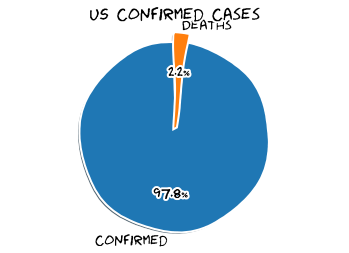

US Population
330362592
US Confirmed
11369504 (3.4415228222933907% of population)
US Deaths
248404

New York City Confirmed
285275 (3.4218695216651627% of population)
New York City Deaths
24119

Philippines Confirmed
412097
Philippines Deaths
7957



In [11]:
# quick summary
us_details()

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[(ny['admin2'] == 'Queens') | (ny['admin2'] == 'Kings') | (ny['admin2'] == 'New York') | (ny['admin2'] == 'Bronx') | (ny['admin2'] == 'Richmond')]
nyc_confirmed = nyc['confirmed'].sum()
nyc_deaths = nyc['deaths'].sum()
# from https://www.census.gov/quickfacts/newyorkcitynewyork
nyc_population = 8336817

nyc_confirmed_perc_of_pop = (nyc_confirmed/nyc_population) * 100
nyc_deaths_perc_of_confirmed = (nyc_deaths/nyc_confirmed) * 100

print('New York City Confirmed')
print('{0} ({1}% of population)'.format(nyc_confirmed, nyc_confirmed_perc_of_pop))
print('New York City Deaths')
print(nyc_deaths)
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

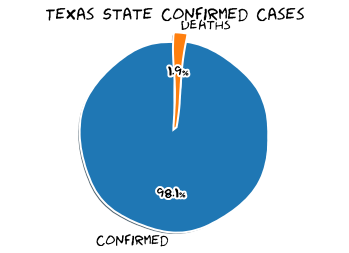

Texas State Total Population
28701845
Texas State Confirmed
1078875 (3.758904697589998% of population)
Texas State Deaths
20147 (1.867408179816939% of confirmed)



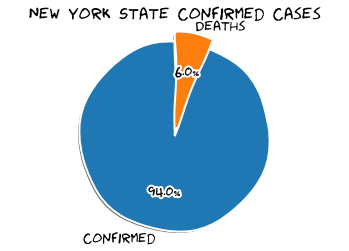

New York State Total Population
19542209
New York State Confirmed
568778 (2.9105102703588934% of population)
New York State Deaths
34015 (5.980364922693916% of confirmed)



In [12]:
state_details('Texas')
state_details('New York')

In [13]:
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
9,New York,US,1605713216000,40.710881,-73.816847,83311,0,7323,75988,Queens,36081,"Queens, New York, US",3696.373063,None,None,84036081,USA
10,New York,US,1605713216000,40.636182,-73.949356,82090,0,7455,74635,Kings,36047,"Kings, New York, US",3206.762131,None,None,84036047,USA
19,New York,US,1605713216000,40.852093,-73.862828,59265,0,5022,54243,Bronx,36005,"Bronx, New York, US",4178.868106,None,None,84036005,USA
22,New York,US,1605713216000,40.740665,-73.589419,54715,0,2234,52481,Nassau,36059,"Nassau, New York, US",4032.281837,None,None,84036059,USA
23,New York,US,1605713216000,40.883201,-72.801217,54055,0,2028,52027,Suffolk,36103,"Suffolk, New York, US",3660.772274,None,None,84036103,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2706,New York,US,1605713216000,42.780810,-76.824971,220,0,5,215,Seneca,36099,"Seneca, New York, US",646.754468,None,None,84036099,USA
2715,New York,US,1605713216000,42.635055,-77.103699,217,0,7,210,Yates,36123,"Yates, New York, US",871.031189,None,None,84036123,USA
2761,New York,US,1605713216000,44.590409,-74.299260,195,0,3,192,Franklin,36033,"Franklin, New York, US",389.828475,None,None,84036033,USA
2876,New York,US,1605713216000,42.588317,-74.443390,155,0,2,153,Schoharie,36095,"Schoharie, New York, US",500.016130,None,None,84036095,USA


In [14]:
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
9,New York,US,1605713216000,40.710881,-73.816847,83311,0,7323,75988,Queens,36081,"Queens, New York, US",3696.373063,None,None,84036081,USA
10,New York,US,1605713216000,40.636182,-73.949356,82090,0,7455,74635,Kings,36047,"Kings, New York, US",3206.762131,None,None,84036047,USA
19,New York,US,1605713216000,40.852093,-73.862828,59265,0,5022,54243,Bronx,36005,"Bronx, New York, US",4178.868106,None,None,84036005,USA
33,New York,US,1605713216000,40.767273,-73.971526,40587,0,3212,37375,New York,36061,"New York, New York, US",2491.978294,None,None,84036061,USA
111,New York,US,1605713216000,40.585822,-74.148086,20022,0,1107,18915,Richmond,36085,"Richmond, New York, US",4205.039242,None,None,84036085,USA


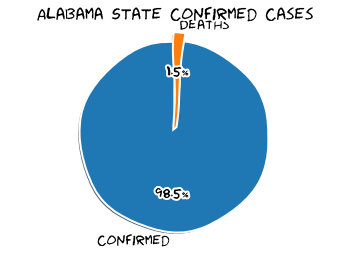

Alabama State Total Population
4887871
Alabama State Confirmed
220848 (4.518286182266267% of population)
Alabama State Deaths
3347 (1.515521987973629% of confirmed)



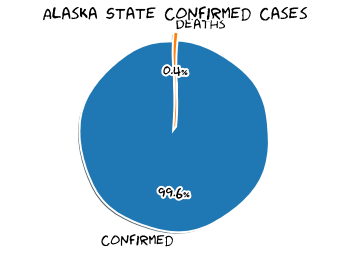

Alaska State Total Population
737438
Alaska State Confirmed
25041 (3.3956752974487343% of population)
Alaska State Deaths
100 (0.3993450740785112% of confirmed)



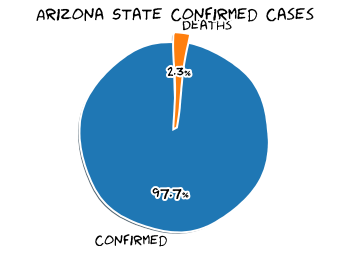

Arizona State Total Population
7171646
Arizona State Confirmed
279896 (3.902813942573295% of population)
Arizona State Deaths
6312 (2.255123331523137% of confirmed)



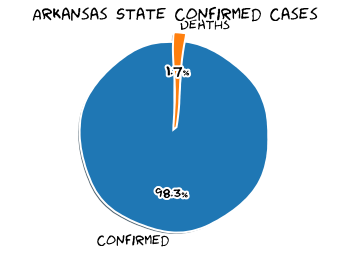

Arkansas State Total Population
3013825
Arkansas State Confirmed
135902 (4.509286371969176% of population)
Arkansas State Deaths
2245 (1.651925652308281% of confirmed)



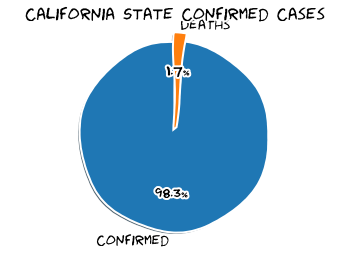

California State Total Population
39557045
California State Confirmed
1054848 (2.6666501504346445% of population)
California State Deaths
18362 (1.740724730008494% of confirmed)



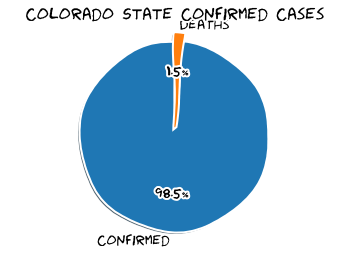

Colorado State Total Population
5695564
Colorado State Confirmed
172044 (3.02066661001439% of population)
Colorado State Deaths
2608 (1.5158912836251193% of confirmed)



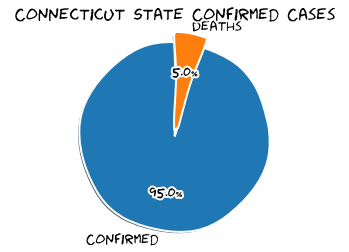

Connecticut State Total Population
3572665
Connecticut State Confirmed
94986 (2.658687562365909% of population)
Connecticut State Deaths
4771 (5.022845471964289% of confirmed)



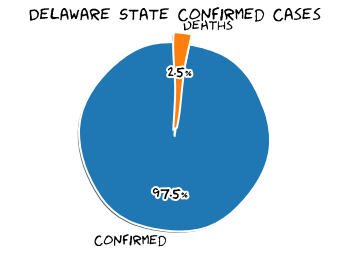

Delaware State Total Population
967171
Delaware State Confirmed
29552 (3.0555093153123902% of population)
Delaware State Deaths
739 (2.5006767731456416% of confirmed)



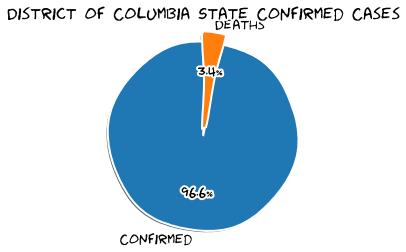

District of Columbia State Total Population
702455
District of Columbia State Confirmed
19465 (2.7709960068616497% of population)
District of Columbia State Deaths
665 (3.4163883894169023% of confirmed)



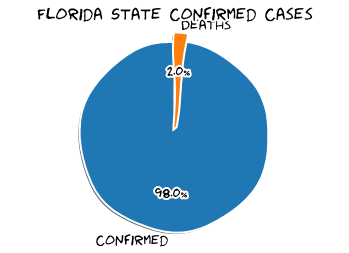

Florida State Total Population
21299325
Florida State Confirmed
897323 (4.212917545509072% of population)
Florida State Deaths
17644 (1.9662930739544178% of confirmed)



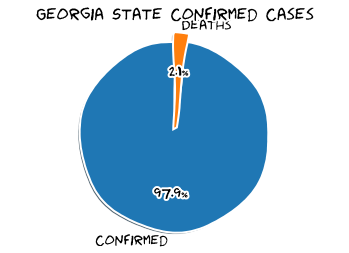

Georgia State Total Population
10519475
Georgia State Confirmed
430571 (4.093084493285073% of population)
Georgia State Deaths
9008 (2.092105599308825% of confirmed)



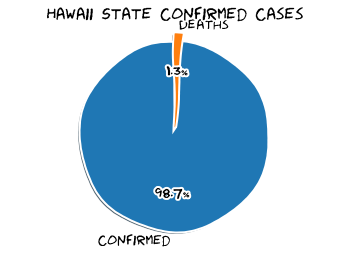

Hawaii State Total Population
1420491
Hawaii State Confirmed
16905 (1.1900814577494683% of population)
Hawaii State Deaths
222 (1.3132209405501332% of confirmed)



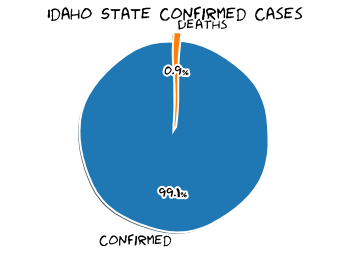

Idaho State Total Population
1754208
Idaho State Confirmed
85125 (4.852617249493789% of population)
Idaho State Deaths
798 (0.9374449339207048% of confirmed)



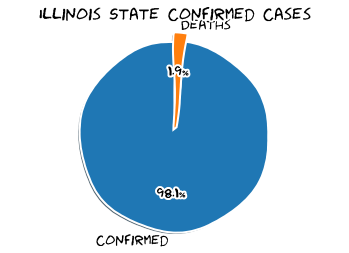

Illinois State Total Population
12741080
Illinois State Confirmed
597849 (4.692294530761913% of population)
Illinois State Deaths
11317 (1.892952902823288% of confirmed)



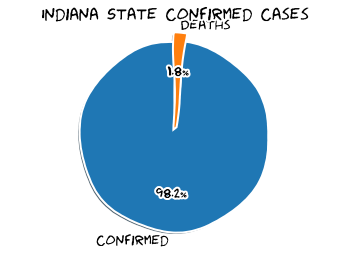

Indiana State Total Population
6691878
Indiana State Confirmed
262207 (3.9182872132456694% of population)
Indiana State Deaths
4770 (1.8191734011677796% of confirmed)



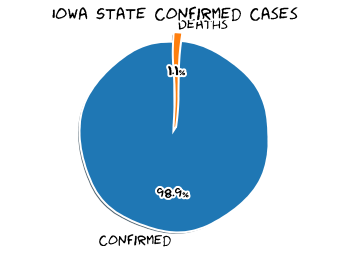

Iowa State Total Population
3156145
Iowa State Confirmed
194472 (6.161694092001476% of population)
Iowa State Deaths
2064 (1.0613353079106502% of confirmed)



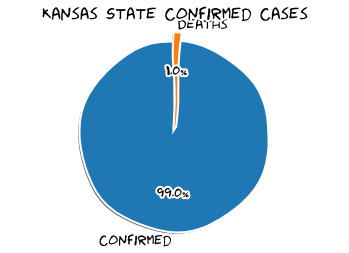

Kansas State Total Population
2911510
Kansas State Confirmed
125294 (4.303402701690875% of population)
Kansas State Deaths
1222 (0.9753060800996057% of confirmed)



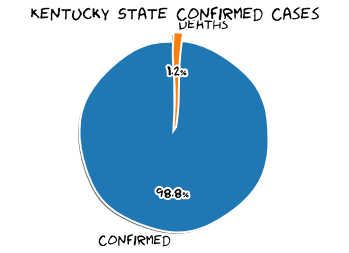

Kentucky State Total Population
4468402
Kentucky State Confirmed
142008 (3.178048886380411% of population)
Kentucky State Deaths
1697 (1.1950030984169906% of confirmed)



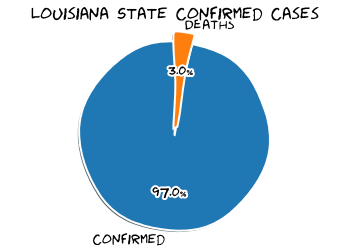

Louisiana State Total Population
4659978
Louisiana State Confirmed
207685 (4.456780697247927% of population)
Louisiana State Deaths
6156 (2.9641042925584418% of confirmed)



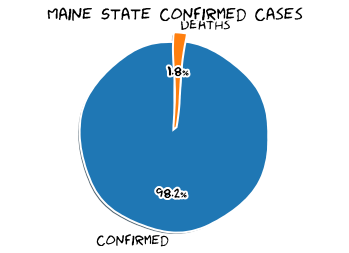

Maine State Total Population
1338404
Maine State Confirmed
9519 (0.7112202294673358% of population)
Maine State Deaths
170 (1.785901880449627% of confirmed)



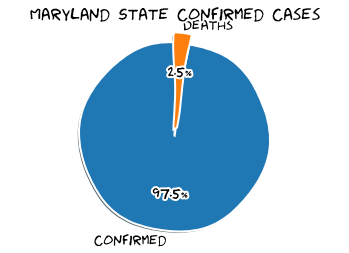

Maryland State Total Population
6042718
Maryland State Confirmed
171823 (2.843472093187205% of population)
Maryland State Deaths
4333 (2.5217811352380064% of confirmed)



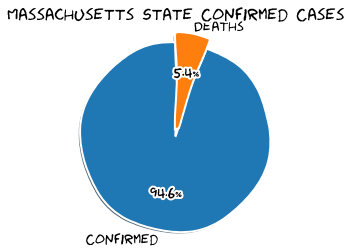

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
192964 (2.7957089886063025% of population)
Massachusetts State Deaths
10360 (5.368877096245932% of confirmed)



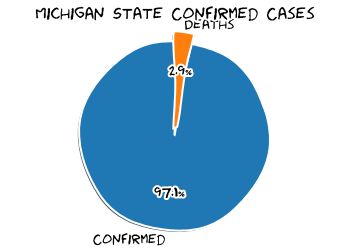

Michigan State Total Population
9995915
Michigan State Confirmed
296840 (2.9696130869460173% of population)
Michigan State Deaths
8511 (2.8672011858240127% of confirmed)



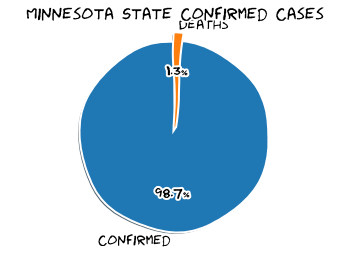

Minnesota State Total Population
5611179
Minnesota State Confirmed
236949 (4.222802373618807% of population)
Minnesota State Deaths
2999 (1.2656732039384002% of confirmed)



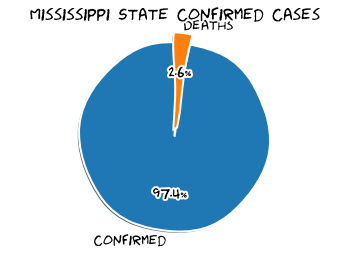

Mississippi State Total Population
2986530
Mississippi State Confirmed
137396 (4.600523015004035% of population)
Mississippi State Deaths
3601 (2.620891437887566% of confirmed)



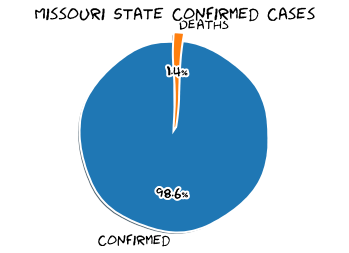

Missouri State Total Population
6126452
Missouri State Confirmed
257840 (4.208634948906806% of population)
Missouri State Deaths
3489 (1.3531647533354019% of confirmed)



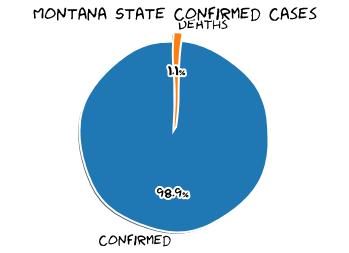

Montana State Total Population
1062305
Montana State Confirmed
49398 (4.650076955300031% of population)
Montana State Deaths
543 (1.099234786833475% of confirmed)



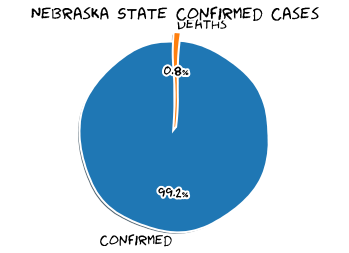

Nebraska State Total Population
1929268
Nebraska State Confirmed
103805 (5.380538110827526% of population)
Nebraska State Deaths
816 (0.786089302056741% of confirmed)



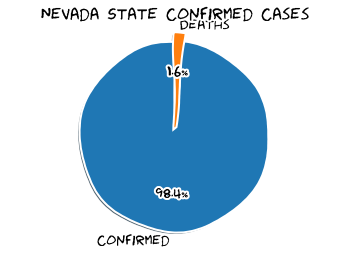

Nevada State Total Population
3034392
Nevada State Confirmed
123795 (4.079729975560178% of population)
Nevada State Deaths
1944 (1.5703380588876774% of confirmed)



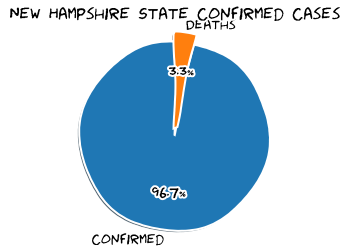

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
15319 (1.129338320832639% of population)
New Hampshire State Deaths
502 (3.276976303936288% of confirmed)



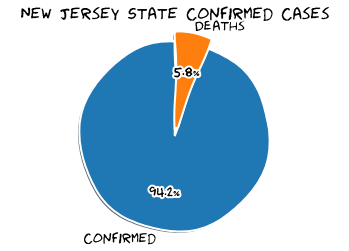

New Jersey State Total Population
8908520
New Jersey State Confirmed
285519 (3.2050104843453235% of population)
New Jersey State Deaths
16618 (5.820278160122444% of confirmed)



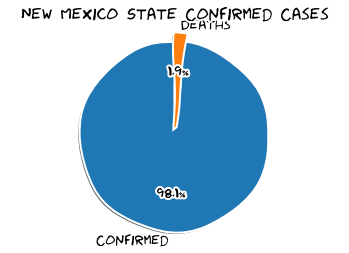

New Mexico State Total Population
2095428
New Mexico State Confirmed
67559 (3.2241145961588753% of population)
New Mexico State Deaths
1264 (1.8709572373776997% of confirmed)



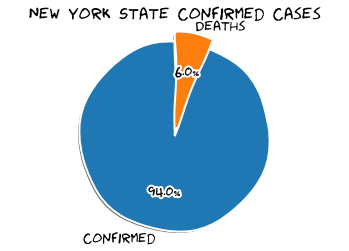

New York State Total Population
19542209
New York State Confirmed
568778 (2.9105102703588934% of population)
New York State Deaths
34015 (5.980364922693916% of confirmed)



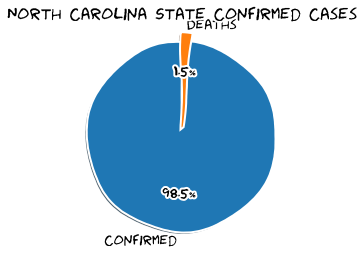

North Carolina State Total Population
10383620
North Carolina State Confirmed
317495 (3.0576523408984535% of population)
North Carolina State Deaths
4852 (1.5282130427250822% of confirmed)



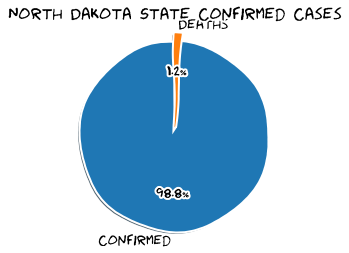

North Dakota State Total Population
760077
North Dakota State Confirmed
66375 (8.732667874439038% of population)
North Dakota State Deaths
772 (1.1630885122410546% of confirmed)



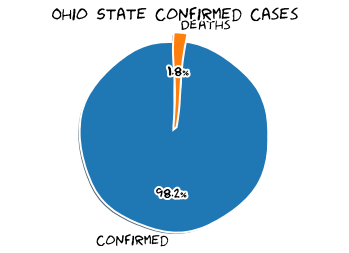

Ohio State Total Population
11689442
Ohio State Confirmed
312443 (2.672864966522782% of population)
Ohio State Deaths
5772 (1.8473769615577882% of confirmed)



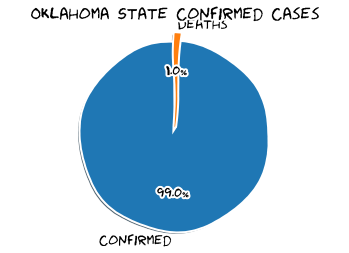

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
158408 (4.017368153161527% of population)
Oklahoma State Deaths
1544 (0.9746982475632543% of confirmed)



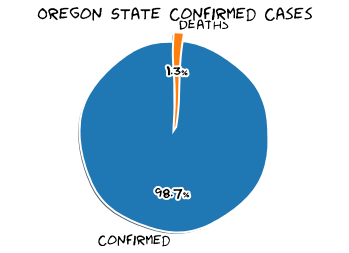

Oregon State Total Population
4190713
Oregon State Confirmed
58570 (1.3976142007338608% of population)
Oregon State Deaths
778 (1.328325081099539% of confirmed)



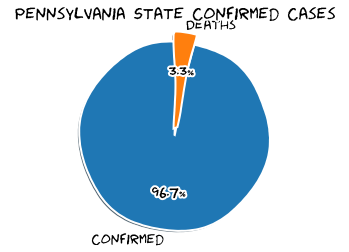

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
280957 (2.1937665631300236% of population)
Pennsylvania State Deaths
9346 (3.3264876831685988% of confirmed)



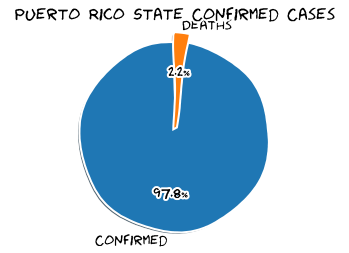

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
43910 (1.3742690882095474% of population)
Puerto Rico State Deaths
971 (2.21134138009565% of confirmed)



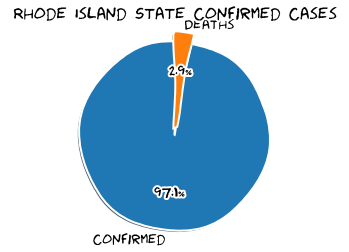

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
44528 (4.211422329201799% of population)
Rhode Island State Deaths
1278 (2.870104204096299% of confirmed)



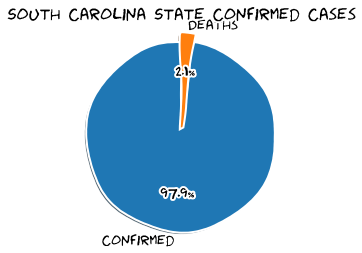

South Carolina State Total Population
5084127
South Carolina State Confirmed
197900 (3.892507012511686% of population)
South Carolina State Deaths
4156 (2.100050530570995% of confirmed)



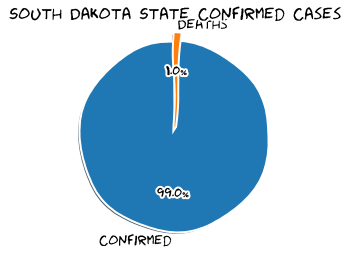

South Dakota State Total Population
882235
South Dakota State Confirmed
67284 (7.626539414101686% of population)
South Dakota State Deaths
644 (0.9571369121930919% of confirmed)



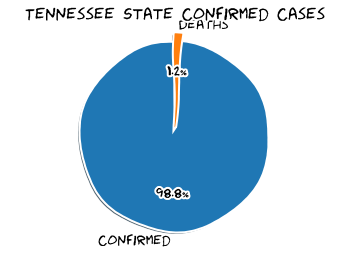

Tennessee State Total Population
6770010
Tennessee State Confirmed
320729 (4.737496694982726% of population)
Tennessee State Deaths
3995 (1.2455998678011655% of confirmed)



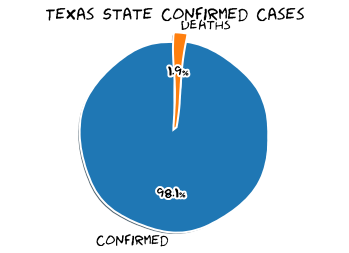

Texas State Total Population
28701845
Texas State Confirmed
1078875 (3.758904697589998% of population)
Texas State Deaths
20147 (1.867408179816939% of confirmed)



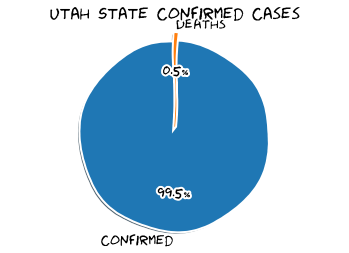

Utah State Total Population
3161105
Utah State Confirmed
158957 (5.028526417186395% of population)
Utah State Deaths
732 (0.4605018967393698% of confirmed)



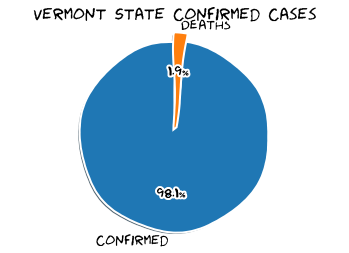

Vermont State Total Population
626299
Vermont State Confirmed
3104 (0.49560992433326573% of population)
Vermont State Deaths
59 (1.9007731958762886% of confirmed)



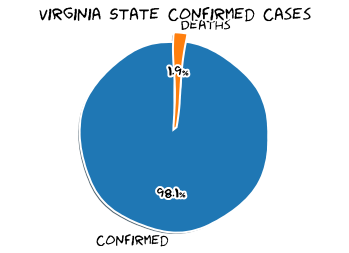

Virginia State Total Population
8517685
Virginia State Confirmed
206762 (2.427443607036419% of population)
Virginia State Deaths
3835 (1.8547895648136505% of confirmed)



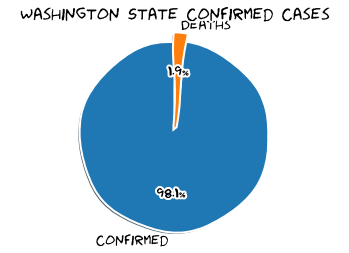

Washington State Total Population
7535591
Washington State Confirmed
134121 (1.779833857755815% of population)
Washington State Deaths
2571 (1.9169257610664996% of confirmed)



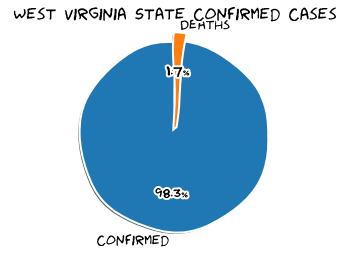

West Virginia State Total Population
1805832
West Virginia State Confirmed
35324 (1.9561066588697065% of population)
West Virginia State Deaths
598 (1.692900011323746% of confirmed)



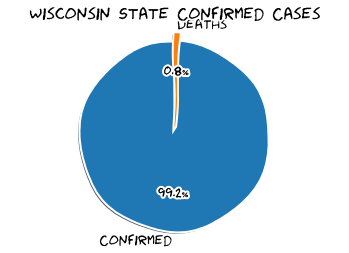

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
342155 (5.885456229289827% of population)
Wisconsin State Deaths
2867 (0.8379243325393462% of confirmed)



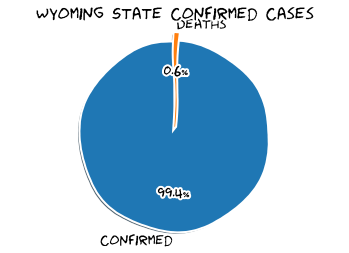

Wyoming State Total Population
577737
Wyoming State Confirmed
24453 (4.2325487202654495% of population)
Wyoming State Deaths
155 (0.6338690549216864% of confirmed)



In [15]:
for i in states:
    state_details(i)

In [16]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 55793403},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 1341455},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-11-18T14:26:46.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 35898286},
 'source': 'https://github.com/mathdroid/covid19'}

In [17]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [18]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey,incidentRate,caseFatalityRatio
0,,,,Afghanistan,2020-11-18 05:40:31,33.93911,67.709953,43628,1638,35160,6830,Afghanistan,112.07258999298223,3.7544696066746126
1,,,,Albania,2020-11-18 05:40:31,41.1533,20.1683,29126,637,13804,14685,Albania,1012.0925707137396,2.1870493716953923
2,,,,Algeria,2020-11-18 05:40:31,28.0339,1.6596,69591,2186,45148,22257,Algeria,158.69861977969373,3.141210788751419
3,,,,Andorra,2020-11-18 05:40:31,42.5063,1.5218,5951,76,4965,910,Andorra,7702.064324079466,1.2770962863384305
4,,,,Angola,2020-11-18 05:40:31,-11.2027,17.8739,13818,328,6582,6908,Angola,42.04310632408888,2.373715443624258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3969,,,,West Bank and Gaza,2020-11-18 05:40:31,31.9522,35.2332,64935,580,55684,8671,West Bank and Gaza,1272.8818822068224,0.8932008932008932
3970,,,,Western Sahara,2020-11-18 05:40:31,24.2155,-12.8858,10,1,8,1,Western Sahara,1.674116485025028,10.0
3971,,,,Yemen,2020-11-18 05:40:31,15.552727,48.516388,2081,607,1410,64,Yemen,6.977141529823943,29.16866890917828
3972,,,,Zambia,2020-11-18 05:40:31,-13.133897,27.849332,17243,353,16473,417,Zambia,93.793740585541,2.047207562489126


In [19]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,California,US,1605713216000,34.308284,-118.228241,344741,0,7300,337441,Los Angeles,06037,"Los Angeles, California, US",3433.980732,None,None,84006037,USA
1,Illinois,US,1605713216000,41.841448,-87.816588,260004,0,6035,253969,Cook,17031,"Cook, Illinois, US",5048.392956,None,None,84017031,USA
2,Florida,US,1605713216000,25.611236,-80.551706,205536,0,3723,201813,Miami-Dade,12086,"Miami-Dade, Florida, US",7564.981192,None,None,84012086,USA
3,Arizona,US,1605713216000,33.348359,-112.491815,178639,0,3809,174830,Maricopa,04013,"Maricopa, Arizona, US",3982.664699,None,None,84004013,USA
4,Texas,US,1605713216000,29.858649,-95.393395,175959,0,2919,173040,Harris,48201,"Harris, Texas, US",3733.224422,None,None,84048201,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,Texas,US,1605713216000,32.743640,-101.431651,4,0,0,4,Borden,48033,"Borden, Texas, US",611.620795,None,None,84048033,USA
3236,Texas,US,1605713216000,31.849476,-103.581857,3,0,0,3,Loving,48301,"Loving, Texas, US",1775.147929,None,None,84048301,USA
3237,Idaho,US,1605713216000,NaN,NaN,1,0,0,1,Unassigned,90016,"Unassigned, Idaho, US",NaN,None,None,84090016,USA
3238,Oregon,US,1605713216000,44.726982,-120.028143,1,0,0,1,Wheeler,41069,"Wheeler, Oregon, US",75.075075,None,None,84041069,USA


In [20]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
9,New York,US,1605713216000,40.710881,-73.816847,83311,0,7323,75988,Queens,36081,"Queens, New York, US",3696.373063,None,None,84036081,USA
10,New York,US,1605713216000,40.636182,-73.949356,82090,0,7455,74635,Kings,36047,"Kings, New York, US",3206.762131,None,None,84036047,USA
19,New York,US,1605713216000,40.852093,-73.862828,59265,0,5022,54243,Bronx,36005,"Bronx, New York, US",4178.868106,None,None,84036005,USA
22,New York,US,1605713216000,40.740665,-73.589419,54715,0,2234,52481,Nassau,36059,"Nassau, New York, US",4032.281837,None,None,84036059,USA
23,New York,US,1605713216000,40.883201,-72.801217,54055,0,2028,52027,Suffolk,36103,"Suffolk, New York, US",3660.772274,None,None,84036103,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2706,New York,US,1605713216000,42.780810,-76.824971,220,0,5,215,Seneca,36099,"Seneca, New York, US",646.754468,None,None,84036099,USA
2715,New York,US,1605713216000,42.635055,-77.103699,217,0,7,210,Yates,36123,"Yates, New York, US",871.031189,None,None,84036123,USA
2761,New York,US,1605713216000,44.590409,-74.299260,195,0,3,192,Franklin,36033,"Franklin, New York, US",389.828475,None,None,84036033,USA
2876,New York,US,1605713216000,42.588317,-74.443390,155,0,2,153,Schoharie,36095,"Schoharie, New York, US",500.016130,None,None,84036095,USA


In [21]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

568778

In [22]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3


In [23]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
22,None,Philippines,1605713216000,12.879721,121.774017,412097,374666,7957,29474.0,None,None,Philippines,376.065815,None,None,608,PHL,PH


In [24]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
